In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# from matplotlib.mpl_toolkits.basemap import Basemap
# from basemap import Basemap
import numpy as np

In [5]:
# Example coordinates of locations in Manhattan (latitude, longitude)
locations = {
    1: (40.824332, -73.938081),  # Central Harlem North
    2: (40.803865, -73.965072),  # Manhattan Valley
    3: (40.779041, -73.947275),  # Yorkville
    4: (40.765389, -73.997188),  # Hudson Yards/Hell's Kitchen
    5: (40.749146, -73.999223),  # Penn Station, 9th Avenue
    6: (40.757393, -73.986048),  # Midtown (Times Square)
    7: (40.737396, -73.992640),  # Union Square/Flatiron
    8: (40.736674, -73.978193),  # Peter Cooper Village
    9: (40.711605, -74.013119),  # World Trade Center
    10: (40.720083, -73.979447)  # Alphabet City
}

# Example weighted adjacency matrix
# adj_matrix = np.array([
#     [0, 2, 0, 3, 0, 0, 0, 0, 0, 0],
#     [2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
#     [0, 1, 0, 4, 0, 0, 0, 0, 0, 0],
#     [3, 0, 4, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 2, 0, 3, 0, 0],
#     [0, 0, 0, 0, 2, 0, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 1, 0, 4, 0, 0],
#     [0, 0, 0, 0, 3, 0, 4, 0, 2, 0],
#     [0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
#     [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
# ])
adj_matrix = np.zeros((10,10)) # To display only the nodes

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Initialize the map
plt.figure()
m = Basemap(projection='merc',
            llcrnrlat=40.695533, urcrnrlat=40.84,
            llcrnrlon=-74.043468, urcrnrlon=-73.917852,
            resolution='f') # c (crude) < l (low) < i (intermediate) < h (high) < f (full)
# m.bluemarble()
# m.shadedrelief()

# Draw map details
m.drawcoastlines()
m.drawcountries()
# m.drawstates()
m.drawrivers()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgray', lake_color='aqua')
# m.drawparallels(np.arange(40.68, 40.85, 0.02), labels=[1, 0, 0, 0])
# m.drawmeridians(np.arange(-74.03, -73.90, 0.02), labels=[0, 0, 0, 1])


# Project coordinates to the map
mapped_locations = {node: m(lon, lat) for node, (lat, lon) in locations.items()}

# Draw the nodes
for node, (x, y) in mapped_locations.items():
    m.plot(x, y, 'o', markersize=7, color='red')
    plt.text(x, y, f'{node}', fontsize=10, ha='right', va='bottom')

# Draw the edges with weights
for i, j, weight in G.edges(data='weight'):
    x1, y1 = mapped_locations[i+1]
    x2, y2 = mapped_locations[j+1]
    m.plot([x1, x2], [y1, y2], 'k-', lw=weight)  # Use weight for line width

# plt.title("Network Graph on Manhattan Map with Weighted Edges")
plt.show()


In [45]:
def draw_manhattan(ax, graph: nx.Graph):
    m = Basemap(projection='merc',
            llcrnrlat=40.695533, urcrnrlat=40.84,
            llcrnrlon=-74.043468, urcrnrlon=-73.917852,
            resolution='f', ax=ax) # c (crude) < l (low) < i (intermediate) < h (high) < f (full)

    # Draw map details
    m.drawcoastlines()
    m.drawcountries()
    # m.drawstates()
    m.drawrivers()
    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='lightgray', lake_color='aqua')

    # Project coordinates to the map
    mapped_locations = {node: m(lon, lat) for node, (lat, lon) in locations.items()}

    # Draw the nodes
    for node, (x, y) in mapped_locations.items():
        m.plot(x, y, 'o', markersize=7, color='red')
        ax.text(x, y, f'{node}', fontsize=10, ha='right', va='bottom')

    # Draw the edges with weights
    for i, j, weight in graph.edges(data='weight'):
        x1, y1 = mapped_locations[i+1]
        x2, y2 = mapped_locations[j+1]
        m.plot([x1, x2], [y1, y2], 'k-', lw=weight)  # Use weight for line width

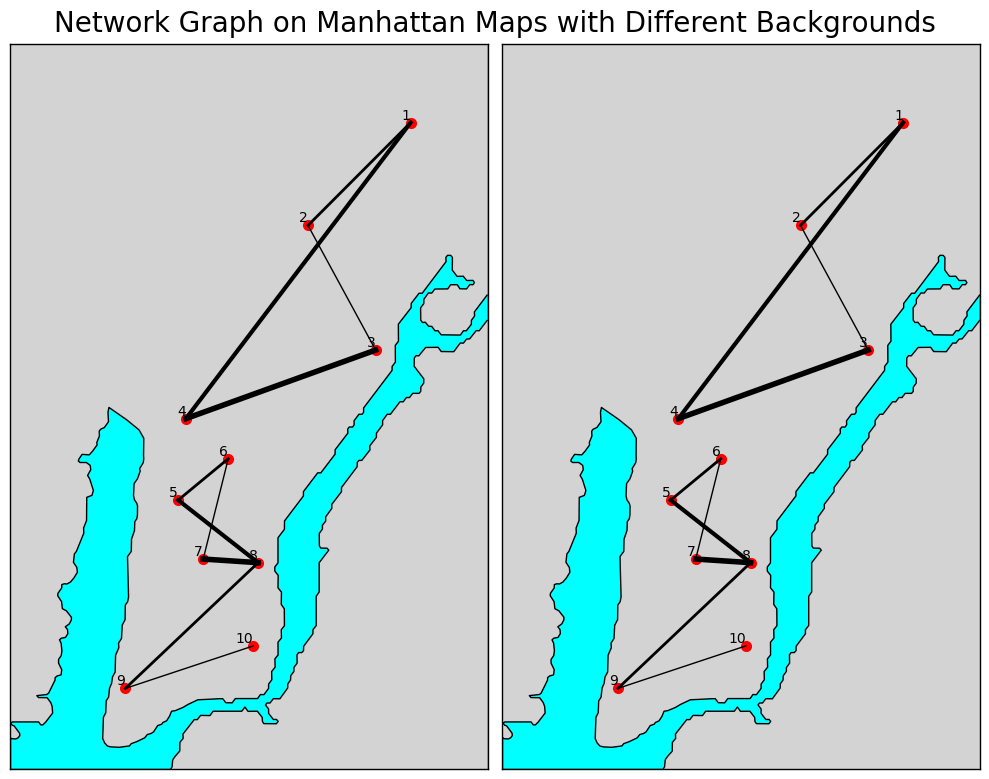

In [46]:
fig, axs=plt.subplots(1,2, figsize=(10,8))

for ax in axs:
    draw_manhattan(ax, graph=G)

plt.suptitle("Network Graph on Manhattan Maps with Different Backgrounds", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [39]:
type(G)

networkx.classes.graph.Graph

In [43]:
type(np.arange(10))

numpy.ndarray

In [2]:
import folium
import networkx as nx
import numpy as np

# Example coordinates of locations in Manhattan (latitude, longitude)
locations = {
    0: (40.7831, -73.9712),  # Central Park
    1: (40.748817, -73.985428),  # Empire State Building
    2: (40.730610, -73.935242),  # East Village
    3: (40.712776, -74.005974),  # Wall Street
}

# Example weighted adjacency matrix
adj_matrix = np.array([[0, 2, 0, 3],
                       [2, 0, 1, 0],
                       [0, 1, 0, 4],
                       [3, 0, 4, 0]])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Center the map around Manhattan
map_center = [40.7831, -73.9712]  # Central Park

# Create a folium map centered on Manhattan with satellite tiles
# m = folium.Map(location=map_center, zoom_start=13, tiles='Stamen Terrain')
# m = folium.Map(location=map_center, zoom_start=13, tiles='Stadia.Alidade.Satellite')
m = folium.Map(location=map_center, zoom_start=13, tiles='Cartodb Positron')
# m = folium.Map(location=map_center, zoom_start=13)

# Add satellite tiles
folium.TileLayer('Stamen Toner').add_to(m)

# Add nodes to the map
for node, (lat, lon) in locations.items():
    folium.Marker([lat, lon], popup=f'Node {node}').add_to(m)

# Add edges to the map with weights
for i, j, weight in G.edges(data='weight'):
    lat1, lon1 = locations[i]
    lat2, lon2 = locations[j]
    folium.PolyLine(locations=[(lat1, lon1), (lat2, lon2)], weight=weight, color='blue').add_to(m)

# Display the map
m.save('manhattan_network_map.html')
m
